In [1]:
# import required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
from tensorflow.keras.models import Model

inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 9, 9, 64)     0           ['conv2d_1[0][0]']               
                                                                                         

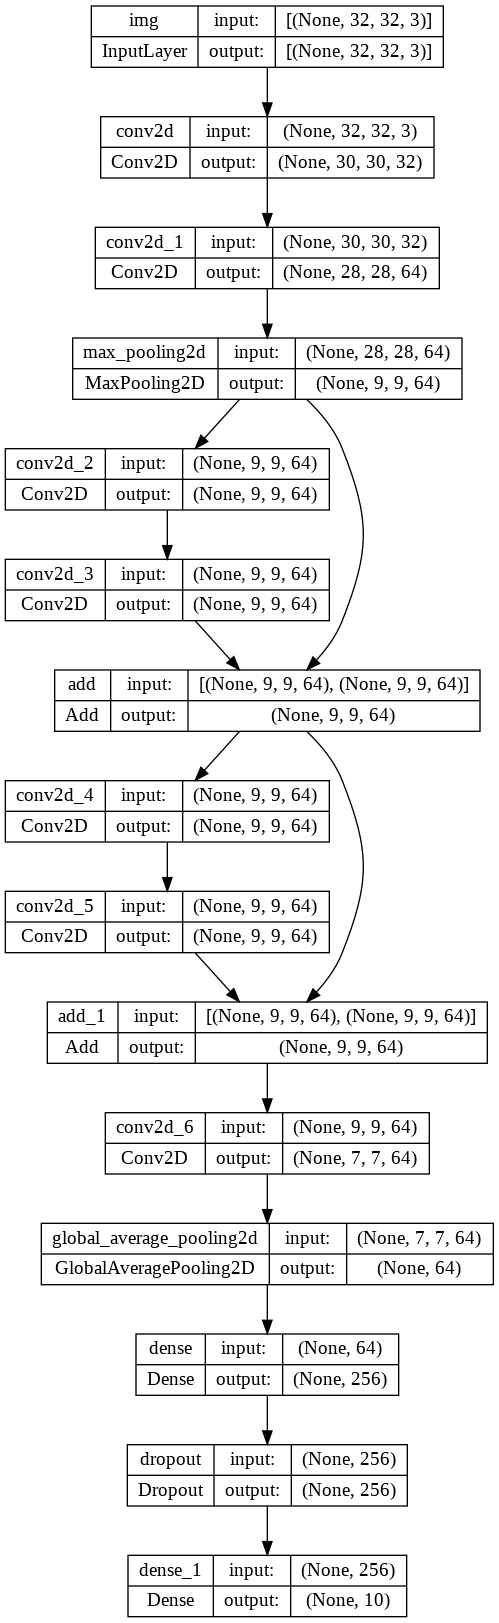

In [4]:
keras.utils.plot_model(model, show_shapes=True)

In [5]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)

In [6]:
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

Epoch 1/15
625/625 [==============================] - 15s 10ms/step - loss: 1.8941 - acc: 0.2801 - val_loss: 1.6126 - val_acc: 0.3966
Epoch 2/15
625/625 [==============================] - 6s 10ms/step - loss: 1.4730 - acc: 0.4560 - val_loss: 1.4172 - val_acc: 0.4863
Epoch 3/15
625/625 [==============================] - 6s 9ms/step - loss: 1.2572 - acc: 0.5478 - val_loss: 1.1218 - val_acc: 0.5957
Epoch 4/15
625/625 [==============================] - 6s 9ms/step - loss: 1.0971 - acc: 0.6104 - val_loss: 1.0023 - val_acc: 0.6493
Epoch 5/15
625/625 [==============================] - 6s 9ms/step - loss: 0.9755 - acc: 0.6553 - val_loss: 0.9100 - val_acc: 0.6753
Epoch 6/15
625/625 [==============================] - 6s 9ms/step - loss: 0.8720 - acc: 0.6952 - val_loss: 0.8548 - val_acc: 0.6985
Epoch 7/15
625/625 [==============================] - 6s 9ms/step - loss: 0.8043 - acc: 0.7198 - val_loss: 0.7959 - val_acc: 0.7210
Epoch 8/15
625/625 [==============================] - 6s 10ms/step - loss

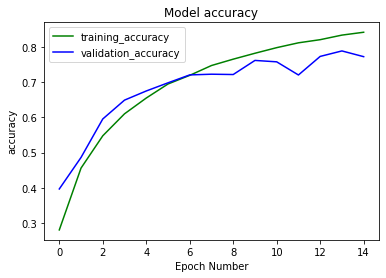

In [8]:
import matplotlib.pyplot as plt
plt.title('Model accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('accuracy')
plt.plot(history.history['acc'],'g',label = 'training_accuracy')
plt.plot(history.history['val_acc'],'b', label = 'validation_accuracy')
plt.legend()

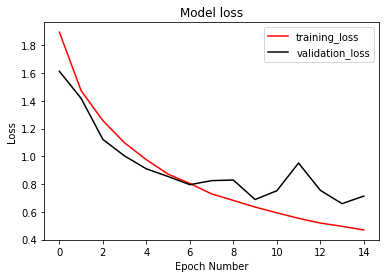

In [9]:
import matplotlib.pyplot as plt
plt.title('Model loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'],'r',label = 'training_loss')
plt.plot(history.history['val_loss'],'k', label = 'validation_loss')
plt.legend()

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7270 - acc: 0.7711


[0.7270165085792542, 0.7710999846458435]